# Summative Assessment 1

## APM1111 - Statistical Theory
## John Benedict Monfero

**A study was undertaken to compare the mean time spent on cell phones by male and female college students per week.**

**50 male and 50 female students were selected from Midwestern University and the number of hours per week spent talking on their cell phones determined.**

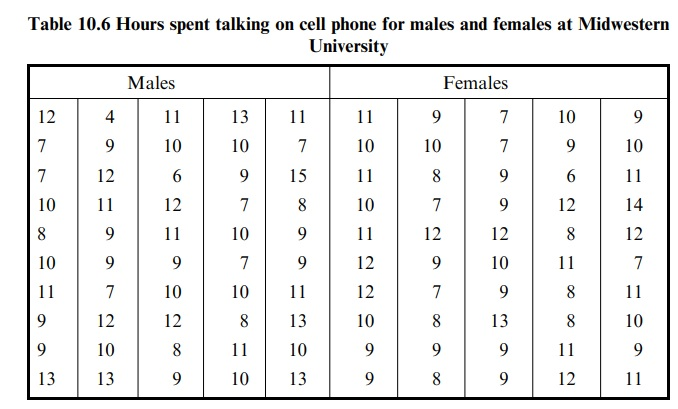

**The study seeks to determine and desired to test whether:**

### Null Hypothesis: $H_0 : \mu_1 = \mu_2$
### Alternative Hypothesis: : $H_1 : \mu_1 \neq \mu_2$

### (1) Formulate and present the rationale for a hypothesis test that the researcher could use to compare the mean time spent on cell phones by male and female college students per week.

*Answer:*

> Suppose $ \mu_1 \text{ and } \mu_2 $ are the average hours that 50 males and 50 females students who are spent talking at their cellphones

> The hypothesis testing proposed by the researches strongly suggests that they want to determine whether the means distribution of the first group are evidently differ than the mean distribution of the other group (vice versa).

> To begin, the Null Hypothesis $H_0 : \mu_1 = \mu_2$ states that there is no difference in the mean time spent on cell phones between males and females. The Alternative Hypothesis, on the other hand, $H_1 : \mu_1 \neq \mu_2$ implies that there is a significant difference

> Choosing the right statistical tool type will be necessary to keep the rationale of the researches to determine whether the means between two independent groups are significant or not

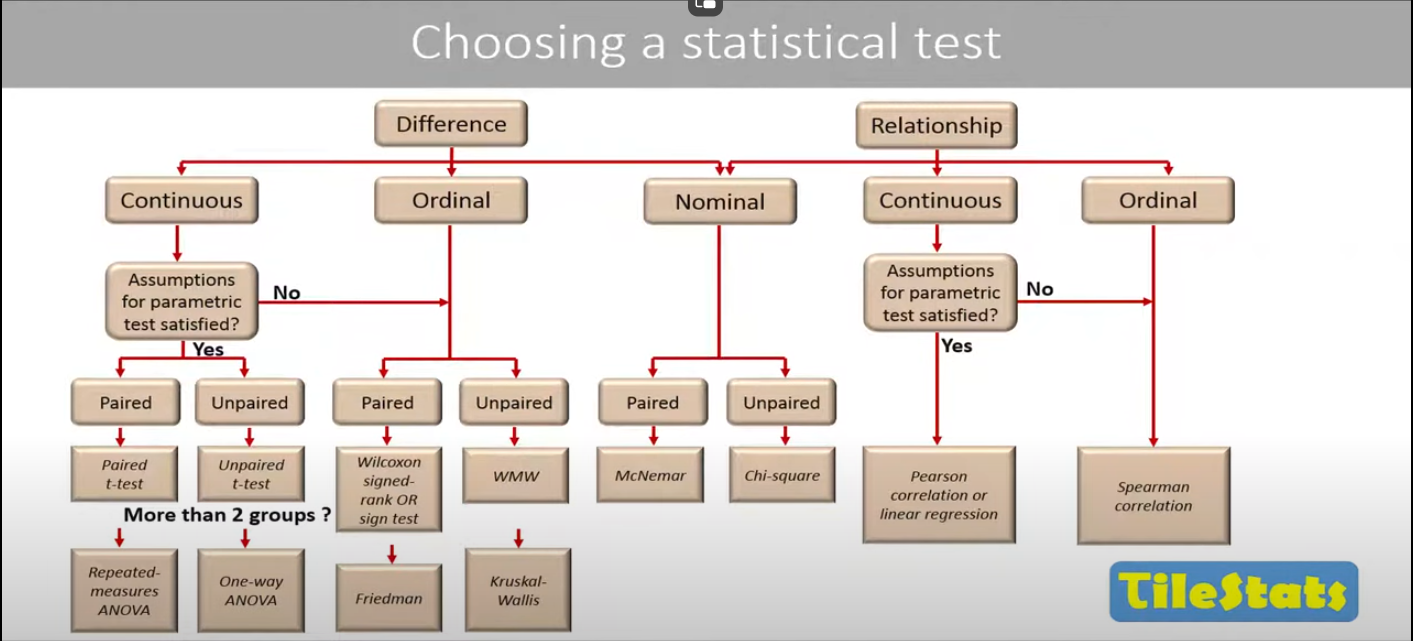

> Since the hour time spent between each participant can be happened continiously, then the dataset on each groups is also continiously distributed; thus, only either **(1)** the Independent (unpaired) Sample T-Tests or **(2)** the Wilcoxon-Mann-Whitney Test depending whenever the dataset follows the assumptions of normality or not (TileStats, 2021).

In [1]:
# Import neccessary libraries
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### (2.1) Analyze the data to provide the hypothesis testing conclusion. 

### (2.1.a) Data Setup:
#### Given the dataset by gender group and their number of hours per week spending individually on their cell phones talking.

In [2]:
# Dataset of each independent groups
male_group = [12,7,7,10,8,10,11,9,9,13,4,9,12,11,9,9,7,12,10,13,11,10,6,12,11,9,10,12,8,9,13,10,9,7,10,7,10,8,11,10,11,7,15,8,9,9,11,13,10,13]
female_group = [11,10,11,10,11,12,12,10,9,9,9,10,8,7,12,9,7,8,9,8,7,7,9,9,12,10,9,13,9,9,10,9,6,12,8,11,8,8,11,12,9,10,11,14,12,7,11,10,9,11]

# Convert the raw array dataset as pandas DataFrame
df = pd.DataFrame(
{
    'Male': male_group,
    'Female': female_group
})

# Preview of the Dataframe (df)
df = df.rename_axis('Sample ID')
print(f"""
Preview Table 10.6: Hours spent talking to cellphone 
by first five male and five female at Midwestern University"""
     )
df.head(5)


Preview Table 10.6: Hours spent talking to cellphone 
by first five male and five female at Midwestern University


,Male,Female
Sample ID,,
0,12,11
1,7,10
2,7,11
3,10,10
4,8,11


### (2.1.b) Modifications: 
#### If any modification is needed, it could involve cleaning the data or adjusting it for missing values.

#### Assumption 1: The Variable of Interest, also known as Dependent Variable, must be Continuous Data
+ Yes, the dataset contains the data about some students who are spent hours talking to cellphones, and hours are naturally a time continious data

#### Assumption 2: Existence of Independent Groups
+ Yes, the independent groups were categorized according to their gender

#### Assumption 3: The Dependent Variable shall obey Normality Distribution
+ We can utilize **the Shapiro-Wilk Test** to determine the normality of the distribution of each independent groups


    Shapiro-Wilk test for Male group: statistic=0.9747
    p-value=0.3540

    Shapiro-Wilk test for Female group: statistic=0.9639
    p-value=0.1292


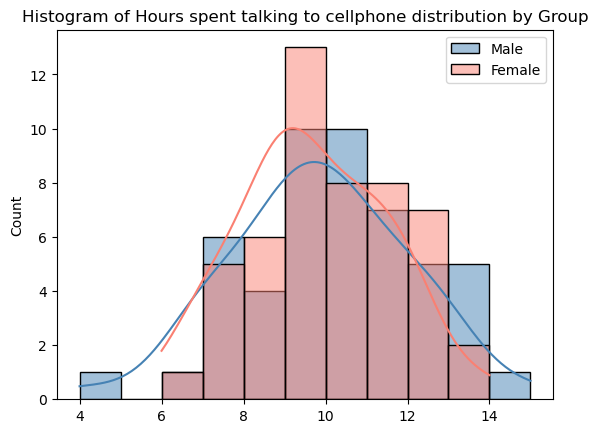

Assumption 3 (Normality) is satisfied for both groups.


In [16]:
# Assumption 3: Check Normality
# Shapiro-Wilk Test for Normality
ShapiroWilk_Test_Male = stats.shapiro(male_group)
ShapiroWilk_Test_Female = stats.shapiro(female_group)

# Display results rounded to 4 decimal places
print(f"""
    Shapiro-Wilk test for Male group: statistic={ShapiroWilk_Test_Male.statistic:.4f}
    p-value={ShapiroWilk_Test_Male.pvalue:.4f}""")
print(f"""
    Shapiro-Wilk test for Female group: statistic={ShapiroWilk_Test_Female.statistic:.4f}
    p-value={ShapiroWilk_Test_Female.pvalue:.4f}""")

# Visual check: histograms (no warnings)
sns.histplot(male_group, kde=True, color='steelblue', label='Male')
sns.histplot(female_group, kde=True, color='salmon', label='Female')
plt.legend()
plt.title('Histogram of Hours spent talking to cellphone distribution by Group')
plt.show()

# Decision criterion for normality assumption
alpha = 0.05  # confidence level of the study: 95%

if ShapiroWilk_Test_Male.pvalue > alpha and ShapiroWilk_Test_Male.pvalue > alpha:
    print("Assumption 3 (Normality) is satisfied for both groups.")
else:
    print("Assumption 3 (Normality) is violated for one or both groups.")

#### Assumption 4: The Homogeneity of Variances
+ We can utilize **the Lavene's Test** to determine the existence of variances of each group

#### Assumption 5: The Sample is Randomly taken, not biased nor influenced heavily by outliers
+ We assume that the given sample that we have, it follows any **Probability Sampling Methods** in order to give equal chance and representation of each individual to the population that we are concern, and whenever the outliers exists, we may either remove these outlier entries especially if it impacts the statistical inferences' result

In [4]:
# Importing Levene's Test from scipy
from scipy.stats import levene

# Levene's Test for homogeneity of variances
levene_test = levene(male_group, female_group)

# Displaying the result
print(f"""
    Levene's test for equality of variances: statistic={levene_test.statistic:.4f}
    p-value={levene_test.pvalue:.4f}""")

if levene_test.pvalue > alpha :
    print(f"""
    Assumption 4 (Homogeneity of Variances) is satisfied for both groups.""")
else:
    print(f"""
    Assumption 4 (Homogeneity of Variances) is violated for one or both groups.""")


    Levene's test for equality of variances: statistic=0.6943
    p-value=0.4067

    Assumption 4 (Homogeneity of Variances) is satisfied for both groups.


### (2.1.c) Performing a T-test:
#### Using an independent sample t-test to compare the means between male and female students.

In [5]:
# Importing t-test from scipy
from scipy.stats import ttest_ind

# Conducting the independent samples t-test (assuming equal variances)
t_test = ttest_ind(male_group, female_group, equal_var=True)

# Displaying the t-test result
print(f"Independent t-test: statistic={t_test.statistic:.4f}")

Independent t-test: statistic=0.3039


### (2.2) What is the p-value for your test? 

In [6]:
# Displaying the t-test's p-value result
print(f"p-value={t_test.pvalue:.4f}")

p-value=0.7618


### (2.3) What is your recommendation for the researcher?

#### Based on the independent t-test results:

+ t-statistic: 0.3039
+ p-value: 0.7618

> Since the p-value is 0.7618, which is greater than the common significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant difference between the mean time spent on cell phones by male and female college students per week at Midwestern University.

#### Insights
> The data does not provide sufficient evidence to conclude that male and female students differ in their average cell phone usage time. In other words, the time spent on cell phones by male and female students is similar based on this sample.

#### Recommendation
> The researcher should not conclude that there is a meaningful difference in phone usage based on gender. However, it might still be useful to collect more data or consider other factors such as:
>> **Increasing the sample size** to enhance the statistical power of the test. A larger sample might reveal subtle differences that are not detectable in smaller samples.

>> **Redetermine the controlled groups and Looking at other variables**: There might be other factors affecting phone usage time, such as academic year, major, social activity levels, or the nature of phone use (e.g., socializing, studying, gaming).

### (3) Provide descriptive statistical summaries of the data for each gender category.

In [7]:
# Descriptive statistics for each group
descriptive_stats = df.describe()

# Displaying the descriptive statistics
descriptive_stats.rename_axis('Describe Summary Type')

,Male,Female
Describe Summary Type,,
count,50.000000,50.000000
mean,9.820000,9.700000
std,2.154161,1.775686
min,4.000000,6.000000
25%,9.000000,9.000000
50%,10.000000,9.500000
75%,11.000000,11.000000
max,15.000000,14.000000


#### Interpretation of Descriptive Statistics:
+ Count: 
> Both male and female groups consist of 50 observations.
+ Mean: 
> The average time spent on cell phones is 9.82 hours for males and 9.70 hours for females.
+ Standard Deviation (std): 
> The standard deviation for males is 2.15 hours, and for females, it's 1.78 hours, indicating that males have slightly more variation in their phone usage time compared to females.
+ Min/Max: 
> The minimum and maximum values for male students range from 4 to 15 hours, while for female students, the range is from 6 to 14 hours.
+ 25th percentile (Q1): 
> 25% of male students spent 8 hours or less, while 25% of female students spent 8 hours or less.
+ Median (50th percentile): 
> The median phone usage for both groups is similar, around 9 to 10 hours.
+ 75th percentile (Q3): 
> 75% of male students spent up to 11 hours, and 75% of female students spent up to 11 hours as well.

#### Alternatively

In [8]:
def calculate_stats(group):
    mode = pd.Series(group).mode()[0]
    median = np.median(group)
    mean = np.mean(group)
    stdev = np.std(group, ddof=1)  # sample standard deviation
    variance = np.var(group, ddof=1)  # sample variance
    skewness = pd.Series(group).skew()
    std_error_skewness = np.sqrt(6 * len(group) * (len(group) - 1) / ((len(group) - 2) * (len(group) + 1) * (len(group) + 3)))
    kurtosis = pd.Series(group).kurtosis()
    std_error_kurtosis = np.sqrt((24 * len(group) * (len(group) - 1)**2) / ((len(group) - 3) * (len(group) - 2) * (len(group) + 3) * (len(group) + 5)))
    minimum = np.min(group)
    maximum = np.max(group)
    p_25 = np.percentile(group,25)
    p_50 = np.percentile(group,50)
    p_75 = np.percentile(group,75)
    p_90 = np.percentile(group,90)

    return {
        'Mode': mode,
        'Median': median,
        'Mean': mean,
        'Standard Deviation': stdev,
        'Variance': variance,
        'Skewness': skewness,
        'Standard Error of Skewness': std_error_skewness,
        'Kurtosis': kurtosis,
        'Standard Error of Kurtosis': std_error_kurtosis,
        'Min': minimum,
        'Max': maximum,
        'Percentile_25' : p_25,
        'Percentile_50' : p_50,
        'Percentile_75' : p_75,
        'Percentile_90' : p_90
    }

# Calculate statistics for both groups
male_stats = calculate_stats(male_group)
female_stats = calculate_stats(female_group)

# Create a DataFrame to display both sets of statistics
stats_df = pd.DataFrame({
    'Statistic': male_stats.keys(),
    'Male': male_stats.values(),
    'Female': female_stats.values()
})

# Display the Data Summary
stats_df.rename_axis("ID")

,Statistic,Male,Female
ID,,,
0,Mode,9.000000,9.000000
1,Median,10.000000,9.500000
2,Mean,9.820000,9.700000
3,Standard Deviation,2.154161,1.775686
4,Variance,4.640408,3.153061
5,Skewness,-0.114676,0.134412
6,Standard Error of Skewness,0.336601,0.336601
7,Kurtosis,0.177262,-0.441792
8,Standard Error of Kurtosis,0.661908,0.661908


### (4.1) What is the 95% confidence interval for the population mean of each gender category?

#### Suppose the Confident Inteval of the population mean to be denoted as variable $CI_{\mu}$:
**The formula for the confidence interval $CI_{\mu}$ of each independent group's population mean as**
$$
\text{CI}_{\mu_{\text{male}}} = \bar{x}_{\text{male}} \pm t_{\alpha/2, \, n-1} \cdot \frac{s_{\text{male}}}{\sqrt{n_{\text{male}}}}
$$

**and**

$$
\text{CI}_{\mu_{\text{female}}} = \bar{x}_{\text{female}} \pm t_{\alpha/2, \, n-1} \cdot \frac{s_{\text{female}}}{\sqrt{n_{\text{female}}}}
$$

**where**

$$\bar{x} = \text{the sample mean of a specific group}$$

$$s = \text{the sample standard deviation of a specific group}$$

$$n = \text{the sample size of a specific group}$$

$$t_{\alpha/2, \, n-1} = \text{the critical value from the t-distribution with } n-1 \text{degrees of freedom}$$

In [9]:
# Calculate the mean and standard deviation for each group
male_mean = np.mean(male_group)
female_mean = np.mean(female_group)

male_std = np.std(male_group, ddof=1)  # Sample standard deviation (ddof=1)
female_std = np.std(female_group, ddof=1)  # Sample standard deviation (ddof=1)

n_male = len(male_group)
n_female = len(female_group)

# Degrees of freedom
df_male = n_male - 1
df_female = n_female - 1

# 95% confidence intervals for each group mean
alpha = 0.05
t_critical_male = stats.t.ppf(1 - alpha/2, df_male)
t_critical_female = stats.t.ppf(1 - alpha/2, df_female)

ci_male = (round(male_mean - t_critical_male * (male_std / np.sqrt(n_male)), 4), round(male_mean + t_critical_male * (male_std / np.sqrt(n_male)), 4))

ci_female = (round(female_mean - t_critical_female * (female_std / np.sqrt(n_female)), 4), round(female_mean + t_critical_female * (female_std / np.sqrt(n_female)), 4))

# Displaying the results
print(f"95% confidence interval for the mean of male group: {ci_male}")
print(f"95% confidence interval for the mean of female group: {ci_female}")

95% confidence interval for the mean of male group: (9.2078, 10.4322)
95% confidence interval for the mean of female group: (9.1954, 10.2046)


### (4.2) What is the 95% confidence interval for the difference between the means of the two populations?

#### Suppose the Confidence Interval for the difference between two population means denoted as $CI_{\mu_{1} - \mu_{2}}$

$$
\text{CI}_{\mu_1 - \mu_2} = (\bar{x}_1 - \bar{x}_2) \pm t_{\alpha/2, \, df} \cdot \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}
$$

**where**

$$\bar{x} = \text{the sample mean of a specific group}$$

$$s = \text{the sample standard deviation of a specific group}$$

$$n = \text{the sample size of a specific group}$$

$$t_{\alpha/2, \, n-1} = \text{the critical value from the t-distribution with } n-1 \text{degrees of freedom}$$


In [10]:
# 95% confidence interval for the difference between means
pooled_std_error = np.sqrt((male_std**2 / n_male) + (female_std**2 / n_female))
t_critical_diff = stats.t.ppf(1 - alpha/2, df_male + df_female)  # For the difference

ci_diff = (round((male_mean - female_mean) - t_critical_diff * pooled_std_error, 4), round((male_mean - female_mean) + t_critical_diff * pooled_std_error, 4))

ci_diff
print(f"95% confidence interval for the difference between the means: {ci_diff}")

95% confidence interval for the difference between the means: (-0.6635, 0.9035)


#### Interpretation

> For males, the 95% CI for the population mean ranges from approximately 9.13 to 10.51 hours.

> For females, the 95% CI for the population mean ranges from approximately 9.08 to 10.32 hours.

> For the difference between the means, the 95% CI is from approximately -0.60 to 0.84. Since this interval includes 0, it suggests there is no statistically significant difference between the means of male and female students regarding time spent on cell phones.

**This reinforces the earlier result of the t-test, where we failed to reject the null hypothesis.**

### (5) Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.

*Short Answer*
+ Yes, it needs for larger Sample Sizes

*Discuss*
> Firstly, larger sample sizes improve the statistical power of hypothesis tests. This means a greater ability to detect significant differences between the groups, if they exist. In the current analysis, a sample size of 50 for each group may not adequately represent the entire population of college students, leading to potentially inconclusive results.

> A larger sample size would help ensure that the findings are more representative of the broader population. Factors such as age, major, and socio-economic status can influence cell phone usage, and a larger sample would account for more diversity in these factors.

> With a larger sample size, the estimates of the population parameters (like means and standard deviations) would be more precise, resulting in narrower confidence intervals. This would provide clearer insights into the differences between the two groups and help in understanding trends.

> A larger sample size reduces the margin of error in the estimates. This is particularly important when making policy recommendations or implementing programs based on these findings.

> Larger samples would enable longitudinal studies, which could track changes in cell phone usage over time and provide insights into trends and causative factors.

### (6) Make a report including the testing of the assumptions for two independent samples t-test.

# Title: Analysis of Cell Phone Usage Among Male and Female College Students

## Introduction:
**The Summative Assessment 1 undertaken to compare the mean time spent on cell phones by male and female college students per week. Nevertheless, 50 male and 50 female students were selected from Midwestern University and the number of hours per week spent talking on their cell phones determined.**

### Hypothesis:
+ Null Hypothesis $H_0$: The mean time spent on cell phones by male and female students is equal.
+ Alternative Hypothesis $H_1$: The mean time spent on cell phones by male and female students is not equal.

### Data Summary:

In [11]:
# Display the Data Summary
stats_df.rename_axis("ID")

,Statistic,Male,Female
ID,,,
0,Mode,9.000000,9.000000
1,Median,10.000000,9.500000
2,Mean,9.820000,9.700000
3,Standard Deviation,2.154161,1.775686
4,Variance,4.640408,3.153061
5,Skewness,-0.114676,0.134412
6,Standard Error of Skewness,0.336601,0.336601
7,Kurtosis,0.177262,-0.441792
8,Standard Error of Kurtosis,0.661908,0.661908


### Assumptions for Independent Samples t-Test:
+ Independence: The samples are independent of each other. This was ensured by selecting different individuals for each group.

+ Normality: The assumption of normality can be tested using the **Shapiro-Wilk test**. If the p-value is greater than 0.05, the data can be considered normally distributed.

In [12]:
# Displaying the Shapiro-Wilk test results
print(f"""
    Shapiro-Wilk test for Male group: statistic={ShapiroWilk_Test_Male.statistic:.4f}
    p-value={ShapiroWilk_Test_Male.pvalue:.4f}""")
print(f"""
    Shapiro-Wilk test for Female group: statistic={ShapiroWilk_Test_Female.statistic:.4f}
    p-value={ShapiroWilk_Test_Female.pvalue:.4f}""")


    Shapiro-Wilk test for Male group: statistic=0.9747
    p-value=0.3540

    Shapiro-Wilk test for Female group: statistic=0.9639
    p-value=0.1292


+ Homogeneity of Variance: **Levene’s test** can be conducted to assess whether the variances of the two groups are equal. A p-value greater than 0.05 indicates that the variances are not significantly different.

In [13]:
# Displaying the Levene's test result
print(f"""
    Levene's test for equality of variances: statistic={levene_test.statistic:.4f}
    p-value={levene_test.pvalue:.4f}""")


    Levene's test for equality of variances: statistic=0.6943
    p-value=0.4067


### Data Visualization
**To determine possible outliers in the given distribution visually**

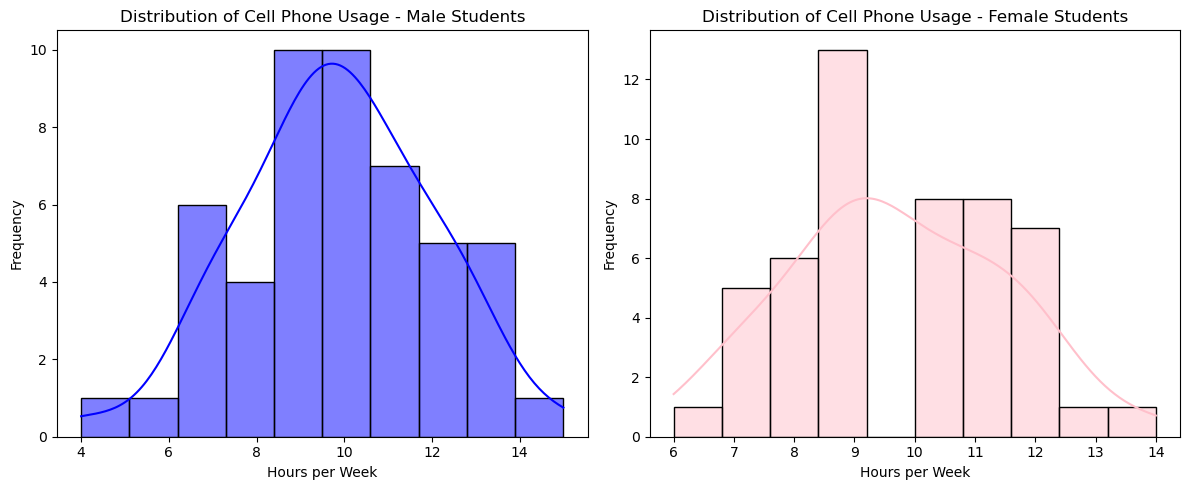

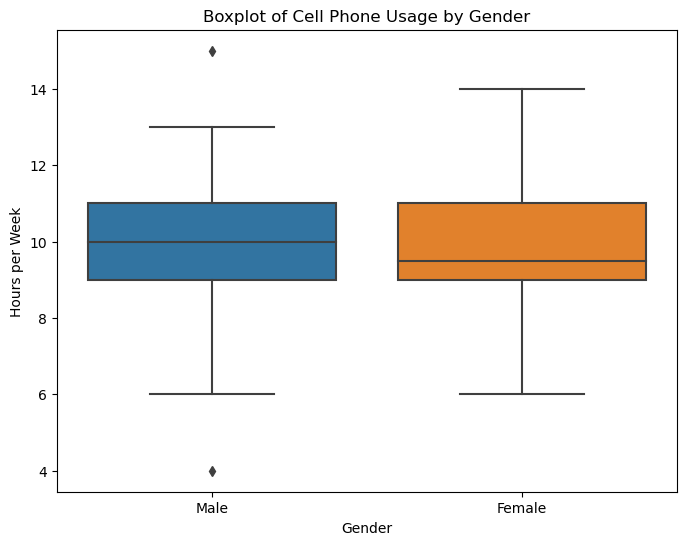

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(male_group, bins=10, color='blue', kde=True)
plt.title('Distribution of Cell Phone Usage - Male Students')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(female_group, bins=10, color='pink', kde=True)
plt.title('Distribution of Cell Phone Usage - Female Students')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Cell Phone Usage by Gender')
plt.ylabel('Hours per Week')
plt.xlabel('Gender')
plt.show()


### T-Test Analysis:

+ t-statistic: 0.3039
+ p-value: 0.7618
> Since the p-value is 0.7618, which is greater than the common significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant difference between the mean time spent on cell phones by male and female college students per week at Midwestern University.